In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
import array as arr
import seaborn as sns
from typing import Optional
import warnings
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [22]:
print(os.getcwd())

C:\Users\ricar\Documents\Dropbox\UNIMI\Artificial Intelligence, Deep Learning, Machine Learning\Machine Learning


In [23]:
data= pd.read_csv('forest-cover-type.csv')

In [24]:
#Checking for missing values
data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [25]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


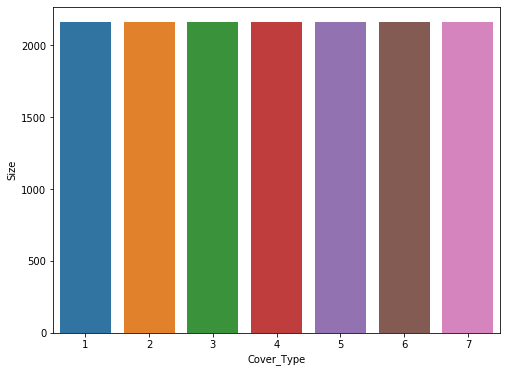

In [26]:
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

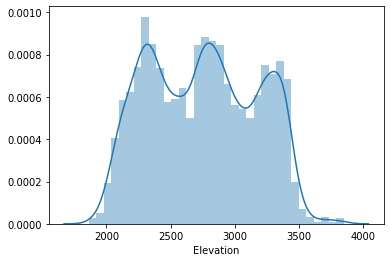

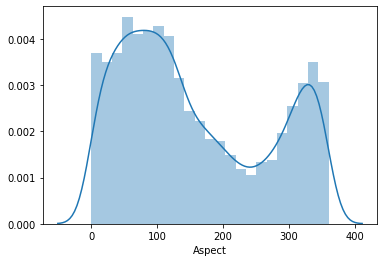

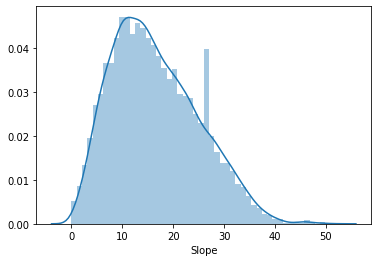

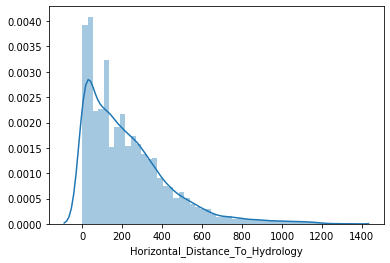

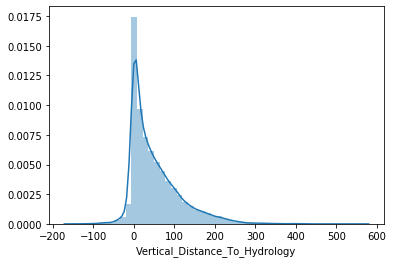

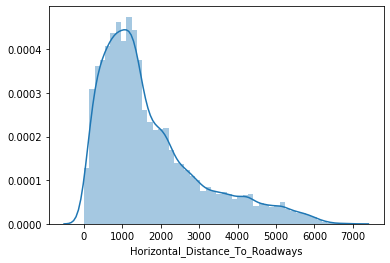

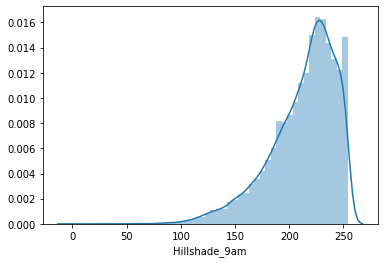

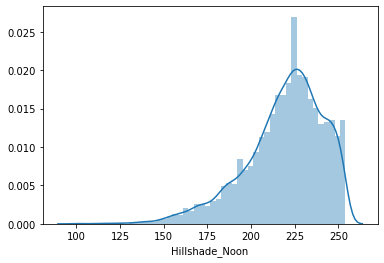

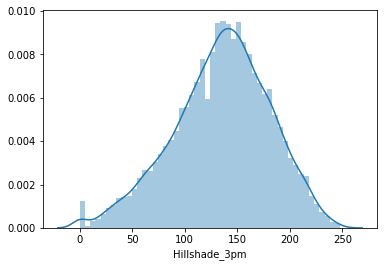

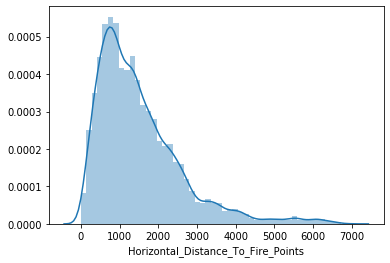

In [27]:
cont_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data=data.loc[:,'Wilderness_Area1':'Soil_Type40']

Wilderness_data=data.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

Soil_data=data.loc[:,'Soil_Type1':'Soil_Type40']

for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    sns.distplot(cont_data[col])

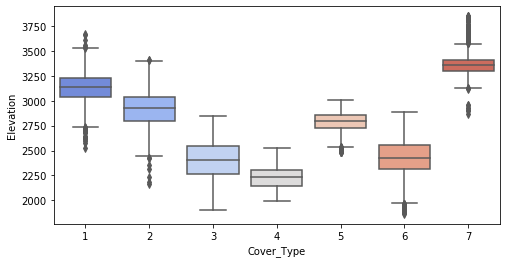

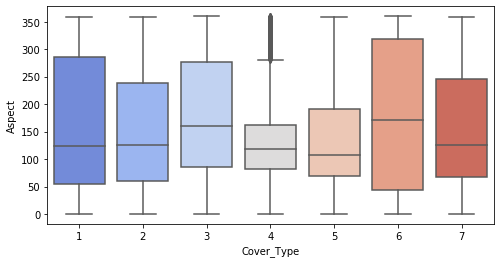

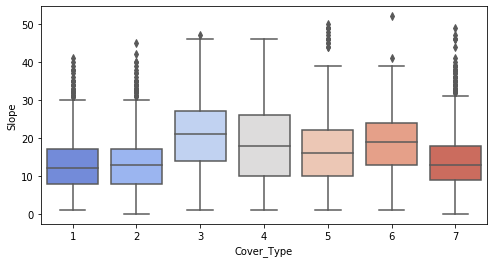

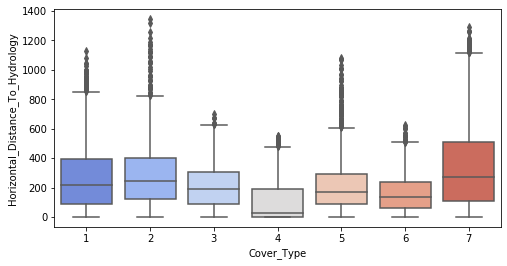

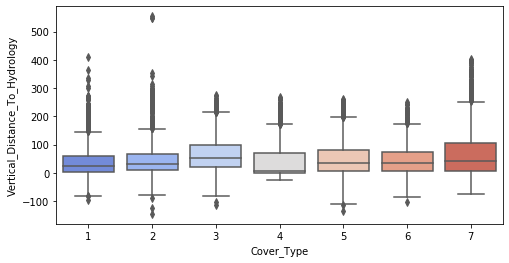

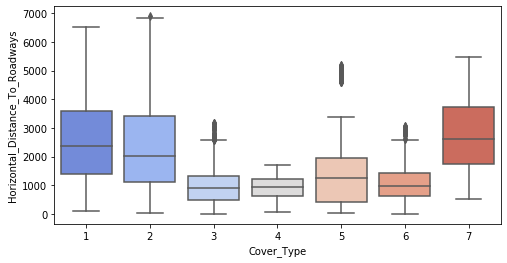

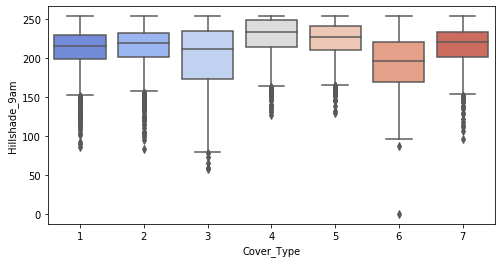

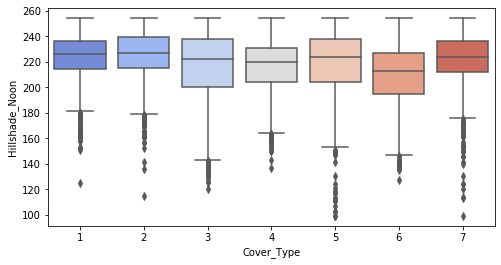

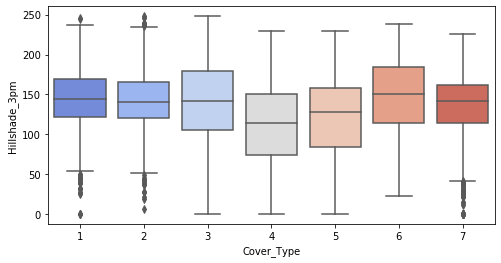

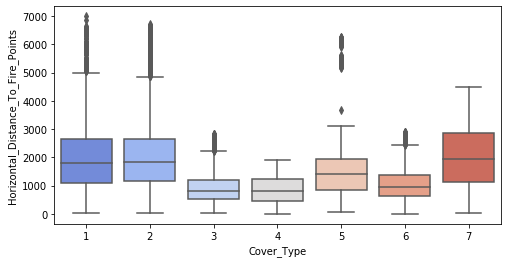

In [28]:
data['Cover_Type']=data['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=data['Cover_Type'], y=col, data=data, palette="coolwarm")

C:\Users\ricar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


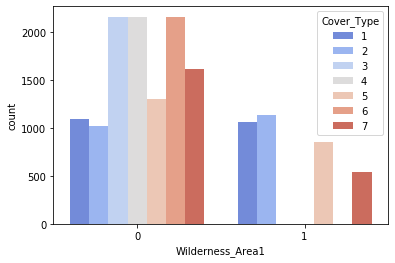

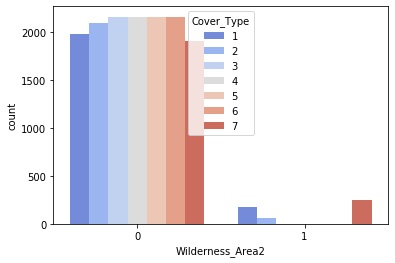

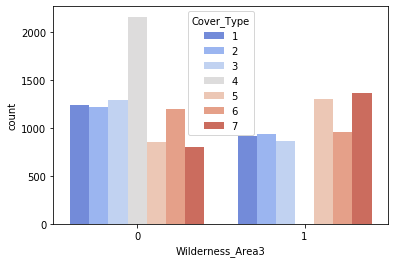

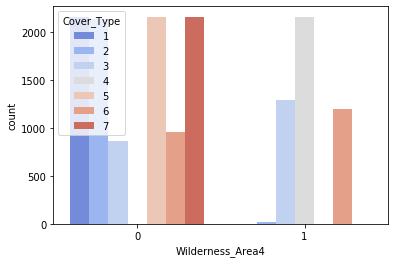

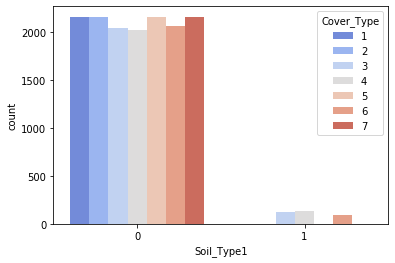

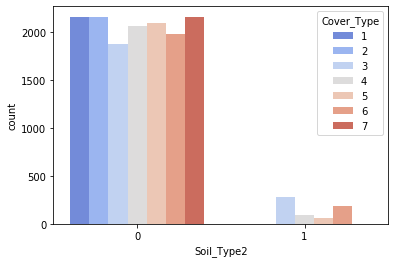

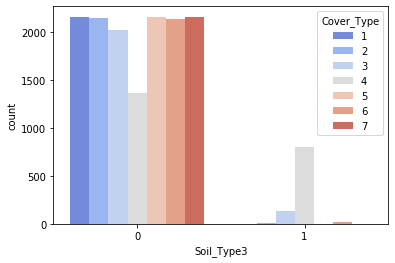

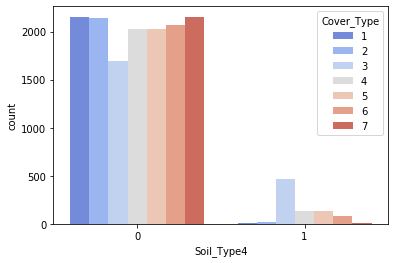

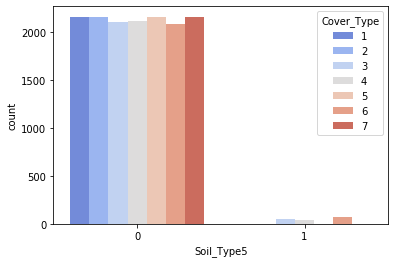

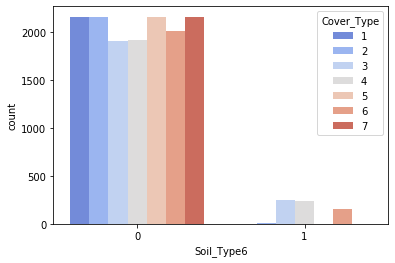

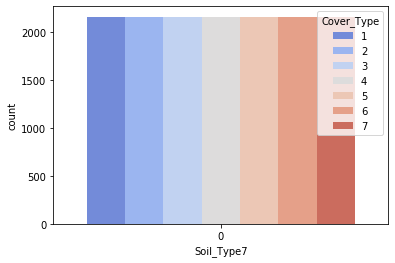

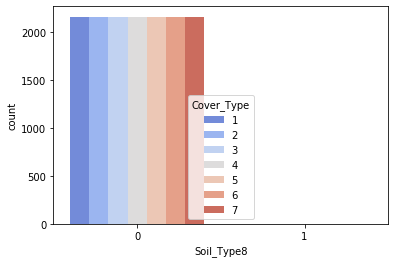

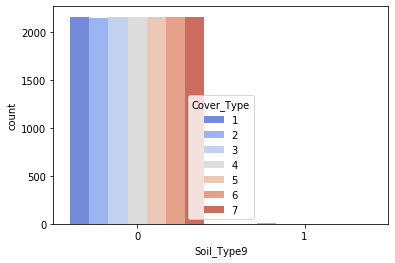

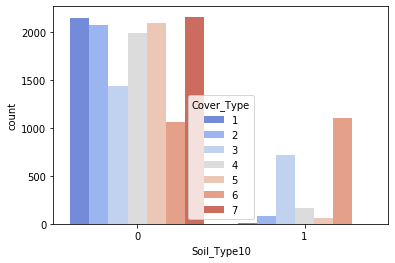

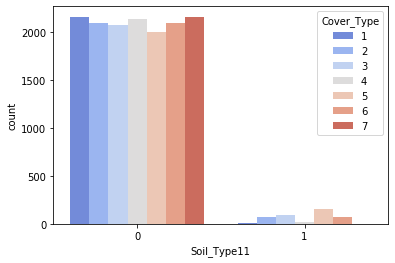

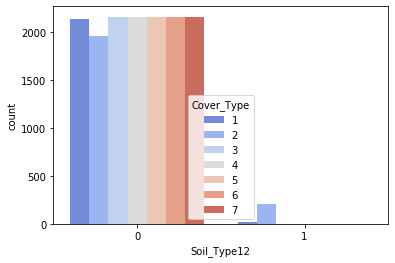

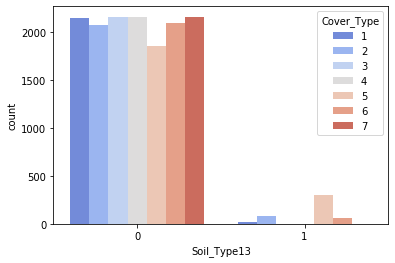

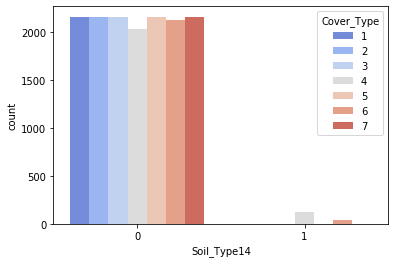

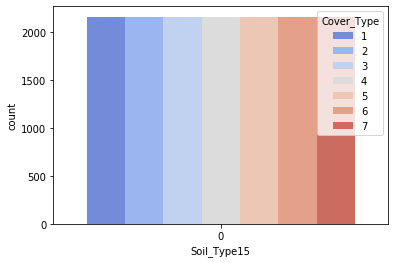

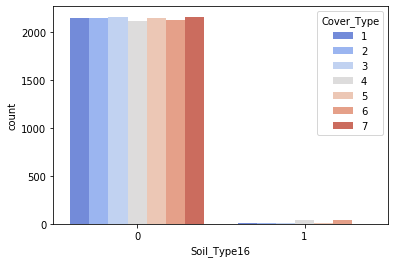

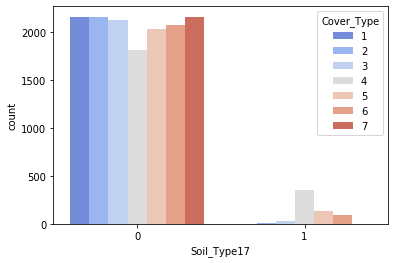

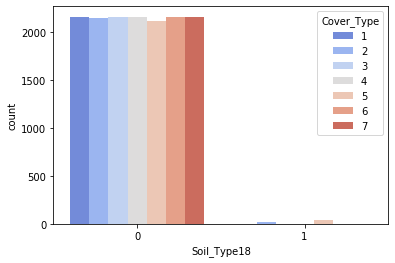

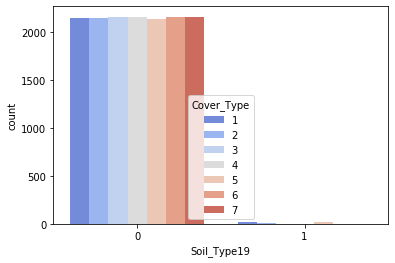

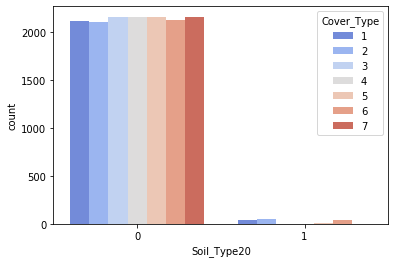

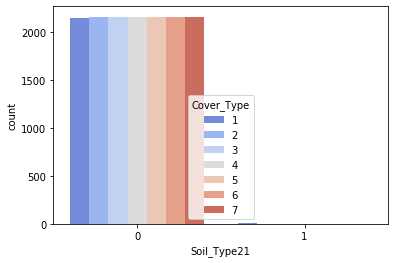

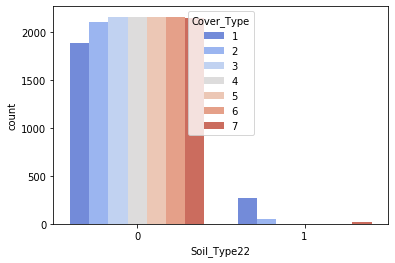

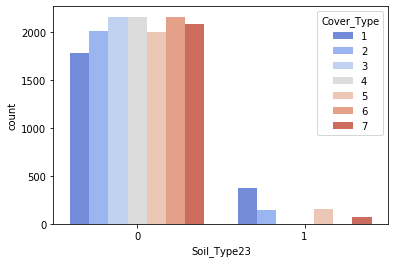

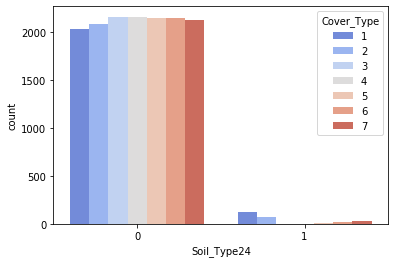

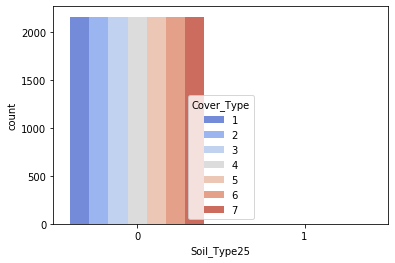

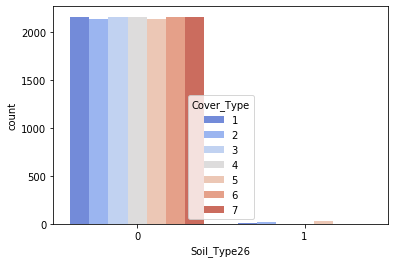

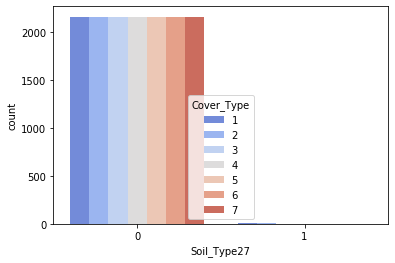

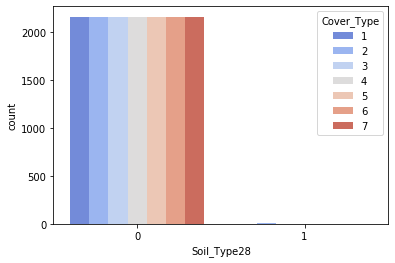

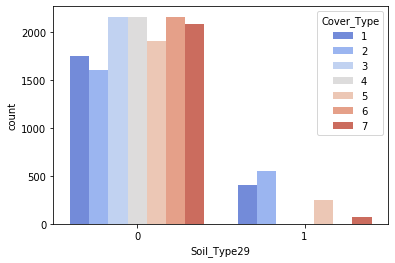

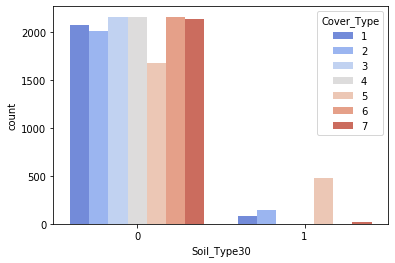

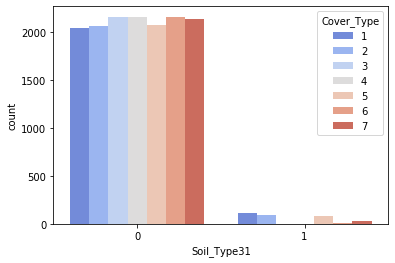

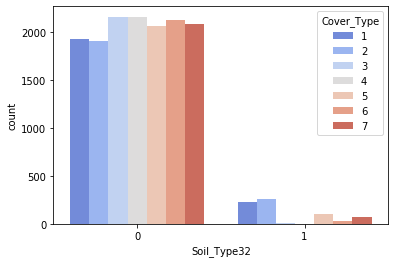

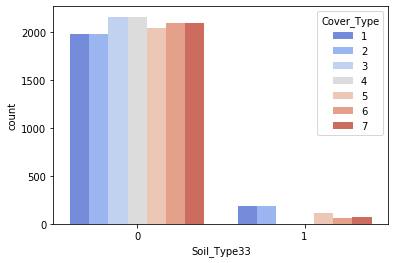

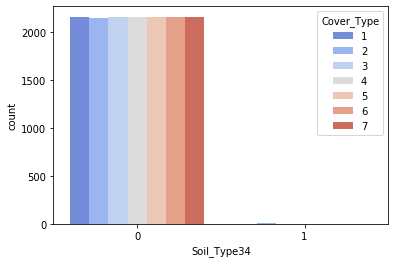

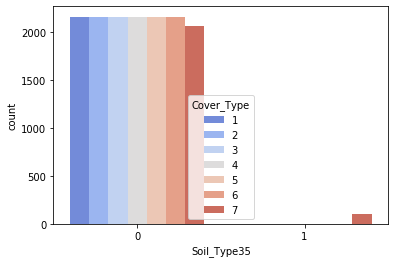

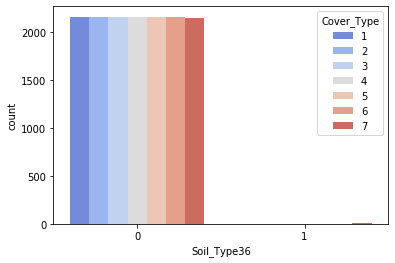

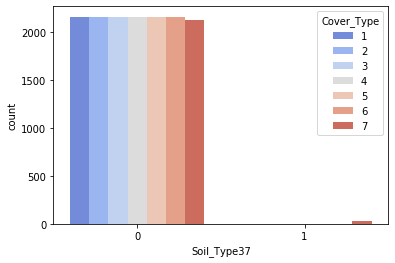

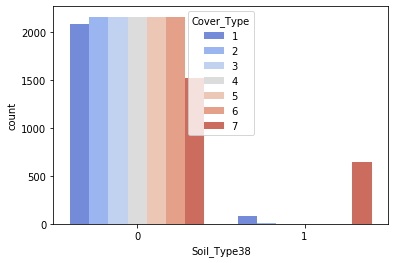

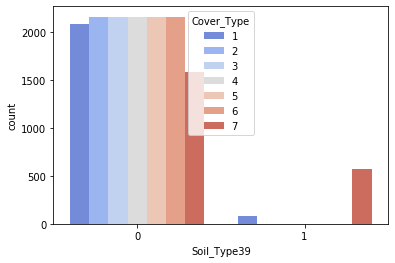

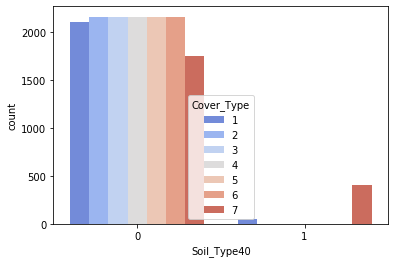

In [9]:
for i, col in enumerate(binary_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=data['Cover_Type'] ,data=data, palette="coolwarm")

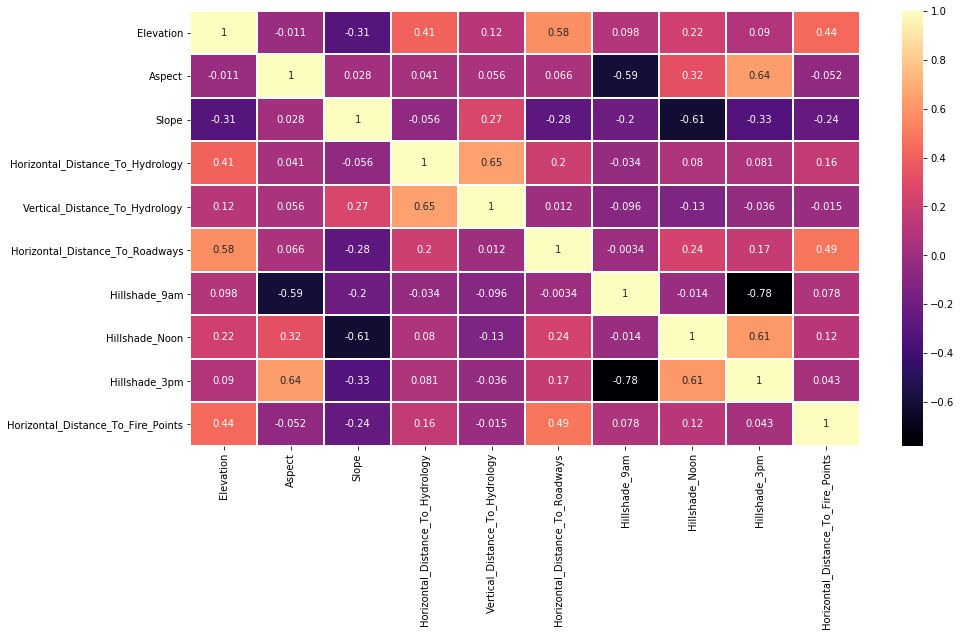

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

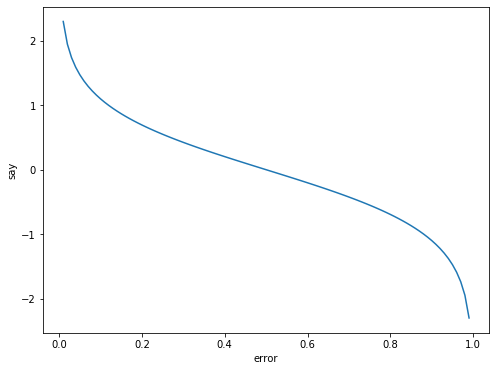

In [30]:
#Decision Stumps are decision trees with only one stump

alpha = lambda x: 0.5 *np.log((1.0-x)/x)
error = np.arange(0.01, 1.00, 0.01)

plt.figure(figsize=(8,6))
plt.xlabel('error')
plt.ylabel('say')
plt.plot(error, alpha(error))
plt.show()

In [31]:
#Steps 1. Initialize weights for each sample 1/N
# Step 2 choose the number of weak learners t in T
#Step 3 train each decision stump (greedy seach to find the best feature and threshold)
#Step 4 Calculate error for decision stumps flip error decison if >0.5
#Step 5 Calculate alpha
#Step 6 Update weights


In [32]:
#Plots T 
def plot_adaboost(X: np.ndarray,
                  y: np.ndarray,
                  clf=None,
                  sample_weights: Optional[np.ndarray] = None,
                  annotate: bool = False,
                  ax: Optional[mpl.axes.Axes] = None) -> None:
    """ Plot ± samples in 2D, optionally with decision boundary if model is provided. """

    assert set(y) == {-1, 1}, 'Expecting response labels to be ±1'

    if not ax:
        fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
        fig.set_facecolor('white')

    pad = 1
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    if sample_weights is not None:
        sizes = np.array(sample_weights) * X.shape[0] * 100
    else:
        sizes = np.ones(shape=X.shape[0]) * 100

    X_pos = X[y == 1]
    sizes_pos = sizes[y == 1]
    ax.scatter(*X_pos.T, s=sizes_pos, marker='+', color='red')

    X_neg = X[y == -1]
    sizes_neg = sizes[y == -1]
    ax.scatter(*X_neg.T, s=sizes_neg, marker='.', c='blue')

    if clf:
        plot_step = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # If all predictions are positive class, adjust color map acordingly
        if list(np.unique(Z)) == [1]:
            fill_colors = ['r']
        else:
            fill_colors = ['b', 'r']

        ax.contourf(xx, yy, Z, colors=fill_colors, alpha=0.2)

    if annotate:
        for i, (x, y) in enumerate(X):
            offset = 0.05
            ax.annotate(f'$x_{i + 1}$', (x + offset, y - offset))

    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

In [33]:

# Decision stump used as weak classifier
class DS():
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions


class AB():

    def __init__(self, n_clf=5):
        self.n_clf = n_clf

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []
        # Iterate through classifiers
        for _ in range(self.n_clf):
            clf = DS()

            min_error = float('inf')
            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred


    


In [34]:
 def __init__(self):
        self.stumps = None
        self.stump_weights = None
        self.errors = None
        self.sample_weights = None

def _check_X_y(self, X, y):
        """ Validate assumptions about format of input data"""
        assert set(y) == {-1, 1}, 'Expecting response variable to be formatted as ±1'
        return X, y

In [35]:
X

NameError: name 'X' is not defined

In [36]:
cover = list(range(1,8))
#cover= list(range(1,3))
T= (3, 5, 7, 10, 15, 50, 100, 500, 1000)
#T= (1, 2)
coverdummies = pd.DataFrame(pd.get_dummies(data['Cover_Type']))

#y_1 = coverdummies[1].values
#y_2 = coverdummies[2].values
#y_3 = coverdummies[3].values
#y_4 = coverdummies[4].values
#y_5 = coverdummies[5].values
#y_6 = coverdummies[6].values
#y_7 = coverdummies[7].values

#y_1=y_1.astype('int')
#y_2=y_2.astype('int')
#y_3=y_3.astype('int')
#y_4=y_4.astype('int')
#y_5=y_5.astype('int')
#y_6=y_6.astype('int')
#y_7=y_7.astype('int')


#y_1[y_1==0] = -1
#y_2[y_2==0] = -1
#y_3[y_3==0] = -1
#y_4[y_4==0] = -1
#y_5[y_5==0] = -1
#y_6[y_6==0] = -1
#y_7[y_7==0] = -1


X= data.drop(columns=['Id', 'Cover_Type']).values
X = X.astype('int')

In [ ]:
for i in cover:
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    y= coverdummies[i].values
    y= y.astype('int')
    y[y==0] = -1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
#Adaboost classification with 5 weak classifiers
    for j in T:
        clf = AB(n_clf=j)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc= accuracy(y_test, y_pred)
        print(acc)
        print(i)
        print(j)
        print(confusion_matrix(y_test, y_pred))


0.8746693121693122
1
3
[[2510   62]
 [ 317  135]]
0.8746693121693122
1
5
[[2510   62]
 [ 317  135]]
0.8763227513227513
1
7
[[2517   55]
 [ 319  133]]
0.876984126984127
1
10
[[2433  139]
 [ 233  219]]
0.8776455026455027
1
15
[[2502   70]
 [ 300  152]]
0.8852513227513228
1
50
[[2464  108]
 [ 239  213]]
0.8908730158730159
1
100
[[2463  109]
 [ 221  231]]
0.892526455026455
1
500
[[2459  113]
 [ 212  240]]
0.8928571428571429
1
1000
[[2457  115]
 [ 209  243]]
0.8720238095238095
2
3
[[2602    2]
 [ 385   35]]
0.8720238095238095
2
5
[[2602    2]
 [ 385   35]]
0.8720238095238095
2
7
[[2602    2]
 [ 385   35]]
0.8528439153439153
2
10
[[2447  157]
 [ 288  132]]
0.8677248677248677
2
15
[[2482  122]
 [ 278  142]]


In [ ]:
clf = AB().fit(X, y, iters=10)
plot_staged_adaboost(X, y, clf)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y_2)
AdaBoostClassifier(n_estimators=100, random_state=0)
clf.score(X, y_1)